<h1>Hotel Bookings Data<h1>

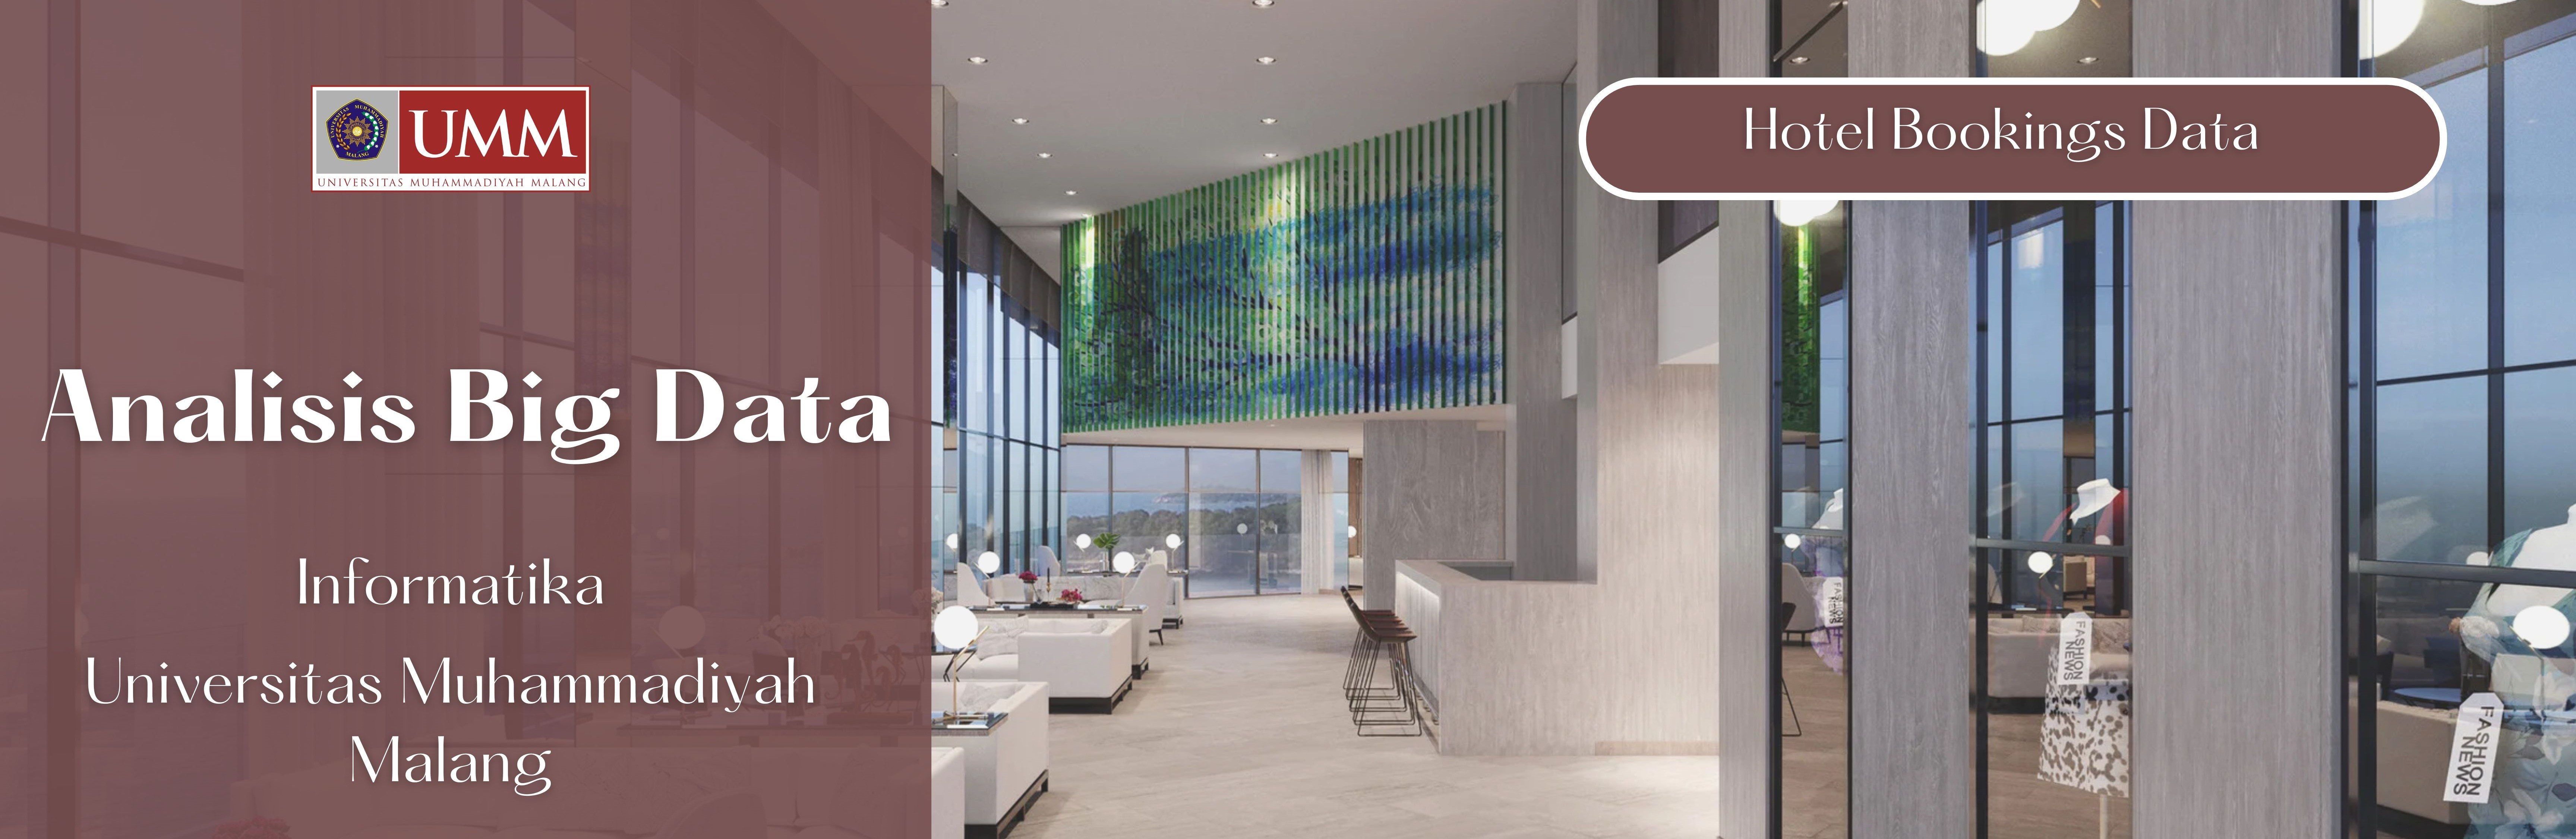

# Pendahuluan

## Pernyataan Masalah

**Hotel Bookings Data** adalah kumpulan data terbuka berupa permintaan pemesanan hotel yang diambil dari jurnal penelitian [Antonio, Almeida dan Nunes, 2019](https://www.sciencedirect.com/science/article/pii/S2352340918315191#f0010).


Pemilihan pengembangan Analisis Big Data menggunakan dataset ini dengan alasan:
*   Membuka peluang eksplorasi analisis data yang lebih luas.
*   Memberikan wawasan terkait tingkat pemesanan dan mendeteksi pembatalan hotel.
*   Meningkatkan kedatangan pengunjung dan mengurangi kerugian
*   Meningkatkan rekomendasi pilihan hotel selama liburan.

Dalam industri perhotelan, tantangan utama yang dihadapi adalah tingkat pembatalan pemesanan yang tinggi dan perencanaan pemesanan yang akurat. Terutama hotel yang memiliki kapasitas terbatas, sangat penting untuk mengetahui seberapa besar kemungkinan pemesanan akan dibatalkan agar bisa mengoptimalkan manajemen sumber daya dan meningkatkan kepuasan pelanggan.

Dengan menggunakan **Hotel Bookings Data**, akan memudahkan menganalisis pola pemesanan dan pembatalan untuk mengidentifikasi faktor-faktor yang memengaruhi keputusan pelanggan untuk membatalkan pemesanan mereka. Hal ini berguna bagi pengelola hotel untuk memahami faktor-faktor yang memengaruhi keputusan pelanggan, sehingga mereka dapat mengoptimalkan strategi pemesanan, mengurangi pembatalan, dan mengelola kapasitas kamar dengan lebih efisien.


## Rencana Mengatasi Pernyataan Masalah

Untuk mengatasi pernyataan masalah ini, **Hotel Bookings Data** mencakup berbagai variabel penting seperti jenis hotel, status pembatalan, lead time (waktu pemesanan hingga kedatangan), jenis makanan dan lain sebagainya.

Metodologi yang digunakan melibatkan beberapa langkah:
1.   **Pra-pemrosesan Data**: Mengatasi nilai yang hilang, mengonversi variabel kategorikal menjadi format numerik, dan normalisasi data.
2.  **Eksplorasi Data**: Menganalisis hubungan antar variabel menggunakan statistik deskriptif dan visualisasi untuk memahami faktor-faktor yang berpengaruh terhadap pembatalan pemesanan.
3.   **Pemodelan**: Menggunakan teknik pembelajaran mesin, seperti *Decision Tree*, *Random Forest*, atau *Logistic Regression*, untuk memprediksi kemungkinan pembatalan berdasarkan variabel yang ada.
4.   **Evaluasi Model**: Menggunakan metrik evaluasi meliputi akurasi, precision, recall, dan F1-score untuk menilai kinerja model dalam memprediksi pembatalan pemesanan.

## Teknik Analisis yang Digunakan

Pada tahap awal, dilakukan eksplorasi data (EDA) untuk memahami distribusi dan pola dalam data. Dengan visualisasi seperti grafik distribusi, histogram, dan heatmap, untuk mengidentifikasi variabel-variabel yang memiliki pengaruh besar terhadap pembatalan pemesanan dan preferensi pelanggan. EDA juga akan digunakan untuk mendeteksi adanya nilai yang hilang atau outlier dalam data, yang perlu diperbaiki agar model yang dibangun lebih akurat.

Pendekatan analisis yang digunakan berfokus pada pemodelan klasifikasi untuk memprediksi pembatalan pemesanan. Dengan memanfaatkan algoritma *Random Forest* yang digunakan untuk mengidentifikasi variabel yang paling berpengaruh terhadap pembatalan dan memprediksi kemungkinan pembatalan di masa depan. *Random Forest*, khususnya, dapat mengatasi masalah overfitting yang sering terjadi dengan dataset yang memiliki banyak fitur, dan dapat memberikan insight yang lebih mendalam melalui *feature importance* yang ditampilkan oleh model.


## Manfaat Analisis untuk Konsumen

Analisis ini akan memberikan manfaat langsung bagi konsumen, terutama hotel atau manajer hotel dalam beberapa cara:
*   Pengurangan Pembatalan
*   Optimalisasi Kapasitas
*   Peningkatan Pengalaman Pelanggan
*   Strategi Pemasaran yang Lebih Tepat Sasaran

# Package yang Diperlukan

Daftar package ini memungkinkan untuk memahami library mana saja yang diperlukan untuk analisis data.

In [ ]:
# Import package yang diperlukan
import pandas as pd             # Untuk manipulasi dan analisis data
import numpy as np              # Untuk operasi numerik
import matplotlib.pyplot as plt # Untuk visualisasi data
import seaborn as sns           # Visualisasi data yang lebih menarik
import warnings                  # Mengatasi peringatan
from sklearn.model_selection import train_test_split  # Membagi data menjadi training dan testing
from sklearn.preprocessing import StandardScaler, LabelEncoder      # Standarisasi dan Konversi data
from sklearn.ensemble import RandomForestClassifier   # Model Random Forest untuk klasifikasi
from sklearn.linear_model import LogisticRegression   # Model Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

Peringatan yang muncul ketika memuat library dapat membingungkan. Oleh karena itu, dengan menghilangkan pesan-pesan tersebut akan memastikan bahwa tampilan kode lebih rapi, profesional, dan mudah dipahami.

In [ ]:
# Menghilangkan peringatan
warnings.filterwarnings("ignore")

# Sumber Data

Dataset diambil dari [Hotel Bookings Dataset](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/hotels.csv). Dataset ini berisi informasi terkait pemesanan hotel, seperti tipe hotel, status pembatalan, tanggal kedatangan, jenis makanan dan preferensi pelanggan. Tujuan awal penyusunan data ini adalah mengembangkan model prediksi untuk mengklasifikasikan kemungkinan pembatalan pemesanan hotel, segmentasi dan kepuasan pelanggan guna memaksimalkan industri pariwisata dan perhotelan. Dataset mencakup:
- **Periode Pengumpulan Data:** 1 Juli 2015 – 31 Agustus 2017
- **Jumlah Variabel:** 32 kolom
- **Jumlah Observasi:** 119.390 baris yang menjelaskan 40.060 observasi untuk Hotel Resort (H1) dan 79.330 observasi untuk Hotel Kota (H2).

Pada dataset ini terdapat Kekhasan atau ciri khas khusus yang beda dengan yang lainnya. Kekhasan ini ada pada pengumpulan dataset yang menggunakan dua jenis hotel berbeda, Hotel Resort (H1) dan Hotel Kota (H2) baik pada pemesanan hotel yang benar-benar tiba maupun yang dibatalkan. Pengumpulan data hotel dilakukan secara *real* (sebenarnya), dengan menghapus elemen yang berkaitan dengan identifikasi hotel atau pelanggan.

Kedua hotel ini berlokasi di Negara Portugal. Hotel Resort (H1) berada di wilayah Algarve dan Hotel Kota (H2) berada di Kota Lisbon.   


In [ ]:
# Mengunduh file CSV dari URL GitHub
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv -O hotels.csv

--2024-12-23 08:39:33--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16855599 (16M) [text/plain]
Saving to: ‘hotels.csv’

hotels.csv          100%[===================>]  16.07M  --.-KB/s    in 0.09s   

2024-12-23 08:39:33 (183 MB/s) - ‘hotels.csv’ saved [16855599/16855599]



# Informasi Dataset

Setelah data di impor, langkah selanjutnya adalah memahami struktur dan isi data, termasuk jumlah observasi, variabel, serta tipe data pada setiap kolom. Untuk memastikan semua kolom terimpor dengan benar dan mengidentifikasi potensi masalah, seperti tipe data yang tidak sesuai (misalnya, angka yang terimpor sebagai string).

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('hotels.csv')

# Menampilkan 5 baris teratas dari dataset
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Menampilkan informasi tentang kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Nilai yang hilang atau *missing values* merupakan masalah yang sering ditemui dalam dataset. Penting untuk memeriksa jumlah data yang hilang di setiap kolom untuk menentukan apakah perlu dilakukan imputasi atau penghapusan baris/kolom yang bermasalah. Nilai yang hilang dapat muncul karena berbagai alasan, seperti data yang tidak tersedia pada saat pemesanan.

In [ ]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# Eksplorasi dan Analisis Data

## Eksplorasi Data

Eksplorasi data adalah proses awal dalam analisis data yang bertujuan untuk memahami dan mendapatkan wawasan tentang dataset sebelum melakukan pemrosesan lebih lanjut. Eksplorasi data dilakukan dengan memahami dataset, mengidentifikasi masalah, dan memberikan visualisasi data dalam mengurangi kesalahan selama proses analisis dan pemodelan.  

#### 1.Perbandingan Pembatalan pemesanan Berdasarkan Bulan Kedatangan

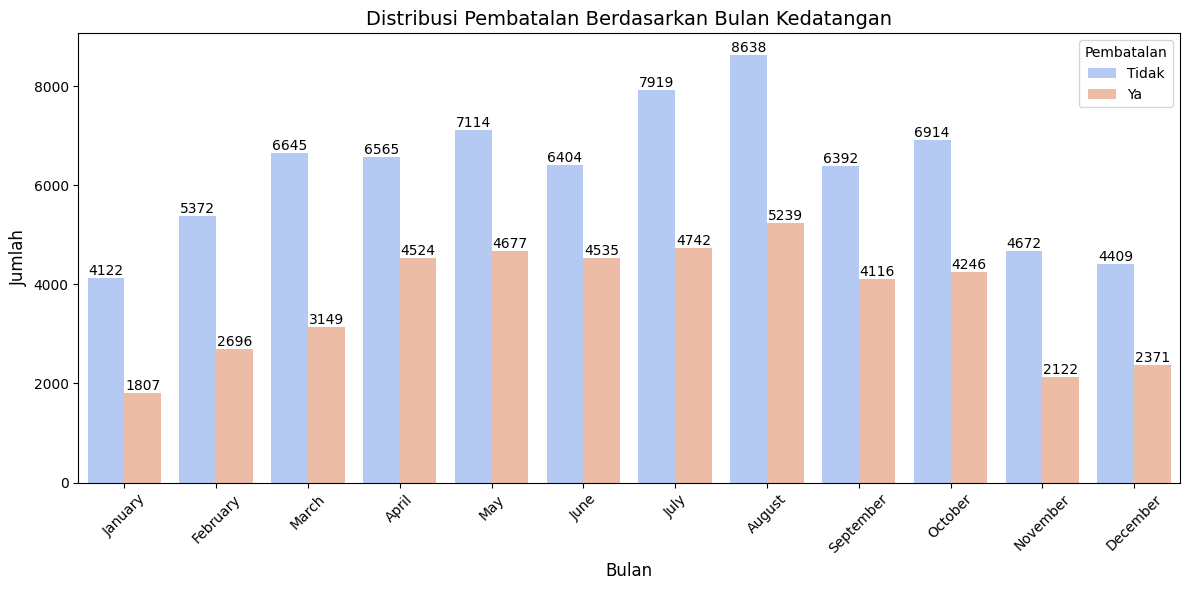

In [ ]:
# Urutkan bulan secara kronologis
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=order_months, ordered=True)

# Plot distribusi pembatalan
plt.figure(figsize=(12, 6))
g = sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', palette='coolwarm')

# Tambahkan data label di atas batang
for container in g.containers:
    g.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Distribusi Pembatalan Berdasarkan Bulan Kedatangan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Pembatalan', loc='upper right', labels=['Tidak', 'Ya'])
plt.tight_layout()
plt.show()

Berdasarkan visualisasi **distribusi pembatalan**, dapat disimpulkan bahwa jumlah pembatalan tertinggi terjadi pada bulan-bulan sibuk seperti Juli dan Agustus, yang bertepatan dengan musim liburan atau *peak season*. Sebaliknya, pembatalan lebih rendah pada bulan-bulan seperti November dan Desember, yang merupakan periode off-season dengan aktivitas perjalanan yang lebih sedikit. Selain itu, terlihat pola bahwa jumlah pembatalan cenderung meningkat seiring dengan tingginya jumlah reservasi, yang mengindikasikan adanya korelasi antara reservasi dan pembatalan.

#### 2.Informasi Tahun Kedatangan

Visualisasi informasi tahun kedatangan di bagi dalam 2 grafik histogram. Bertujuan untuk mendapat informasi jumlah pemesanan hotel berdasarkan tahun dan bulan kedatangan.

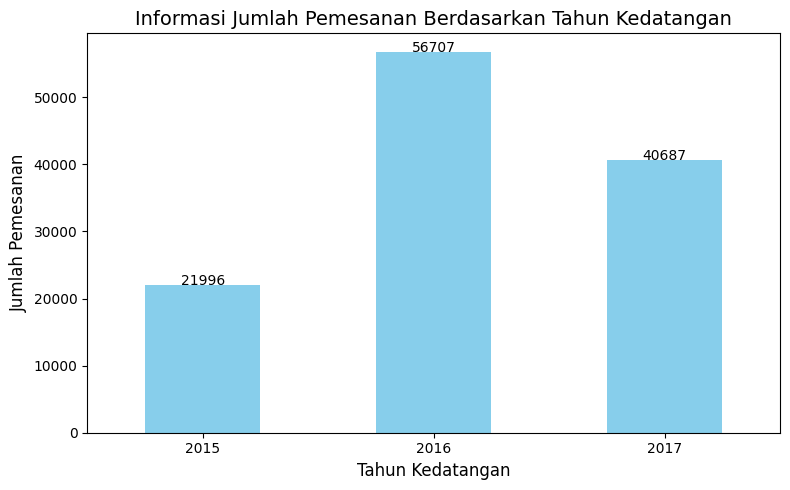

In [ ]:
# a. Berdasarkan Tahun

# Informasi jumlah pemesanan berdasarkan tahun kedatangan
arrival_year_info = df['arrival_date_year'].value_counts().sort_index()

# Membuat plot
plt.figure(figsize=(8, 5))
bars = arrival_year_info.plot(kind='bar', color='skyblue')

# Menambahkan total nilai di atas batang
for i, value in enumerate(arrival_year_info):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

# Menambahkan judul dan label
plt.title('Informasi Jumlah Pemesanan Berdasarkan Tahun Kedatangan', fontsize=14)
plt.xlabel('Tahun Kedatangan', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Menampilkan plot
plt.show()

**Kesimpulan**:  
Dari visualisasi **jumlah pemesanan berdasarkan tahun kedatangan**, terlihat bahwa tahun 2016 memiliki jumlah pemesanan tertinggi. Pada tahun tersebut, jumlah pemesanan meningkat secara signifikan dibandingkan tahun 2015. Namun, pada tahun 2017, terjadi penurunan jumlah pemesanan dibandingkan tahun 2016, meskipun masih lebih tinggi dibandingkan tahun 2015. Hal ini menunjukkan adanya fluktuasi dalam jumlah pemesanan dari tahun ke tahun, dengan puncaknya pada tahun 2016.

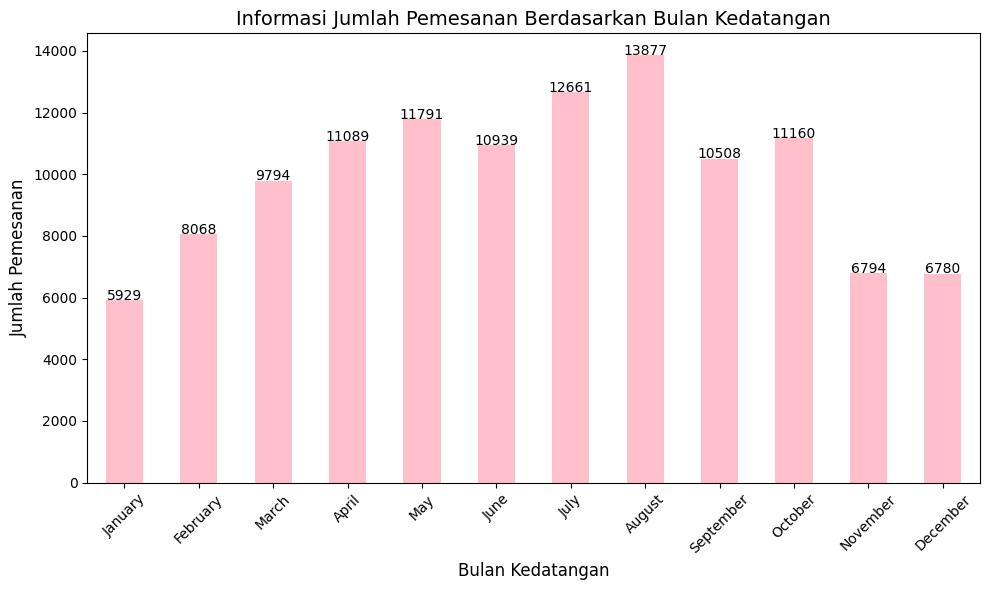

In [ ]:
# b. Berdasarkan Bulan

# Informasi jumlah pemesanan berdasarkan bulan kedatangan
order_months = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=order_months, ordered=True)

arrival_month_info = df['arrival_date_month'].value_counts().sort_index()

# Membuat plot
plt.figure(figsize=(10, 6))
bars = arrival_month_info.plot(kind='bar', color='pink')

# Menambahkan total nilai di atas batang
for i, value in enumerate(arrival_month_info):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

# Menambahkan judul dan label
plt.title('Informasi Jumlah Pemesanan Berdasarkan Bulan Kedatangan', fontsize=14)
plt.xlabel('Bulan Kedatangan', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan visualisasi **jumlah pemesanan berdasarkan bulan kedatangan**, dapat disimpulkan bahwa bulan Agustus mencatat jumlah pemesanan tertinggi, yaitu 13.877 pemesan. Terdapat fluktuasi sepanjang tahun, dengan beberapa bulan, seperti November, Desember, dan Januari menunjukkan pemesanan yang lebih rendah. Juni dan Juli memiliki pemesanan yang tinggi, yang mungkin dipengaruhi oleh musim liburan. Secara keseluruhan, pola pemesanan menunjukkan variasi sepanjang tahun 2015-2017.

#### 3.Jumlah Pembatalan Pemesanan

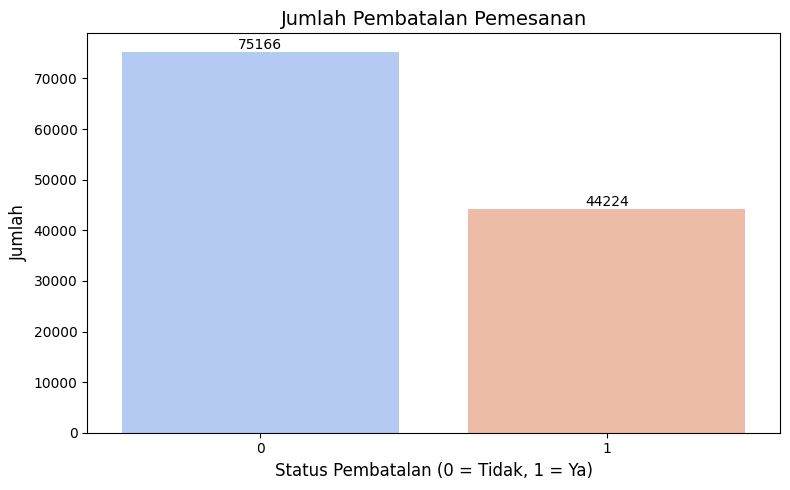

In [ ]:
# Plot jumlah pembatalan pemesanan
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='is_canceled', data=df, palette='coolwarm')

# Menambahkan total nilai di atas batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Jumlah Pembatalan Pemesanan', fontsize=14)
plt.xlabel('Status Pembatalan (0 = Tidak, 1 = Ya)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi **jumlah pembatalan pemesanan**, dapat disimpulkan bahwa jumlah pemesanan yang tidak dibatalkan (status 0) jauh lebih tinggi dibandingkan dengan jumlah pemesanan yang dibatalkan (status 1). Dengan lebih dari 70.000 pemesanan yang tidak dibatalkan, tampak jelas bahwa sebagian besar transaksi berhasil diselesaikan. Sebaliknya, jumlah pemesanan yang dibatalkan hanya sekitar 40.000, menunjukkan bahwa meskipun ada sejumlah pembatalan, proporsi pemesanan yang berhasil jauh lebih dominan. Hal ini mengindikasikan bahwa tingkat pemesanan secara keseluruhan cukup baik, dengan tingkat pembatalan yang relatif rendah.

#### 4.Perbandingan Pembatalan Terhadap Pemesanan Hotel

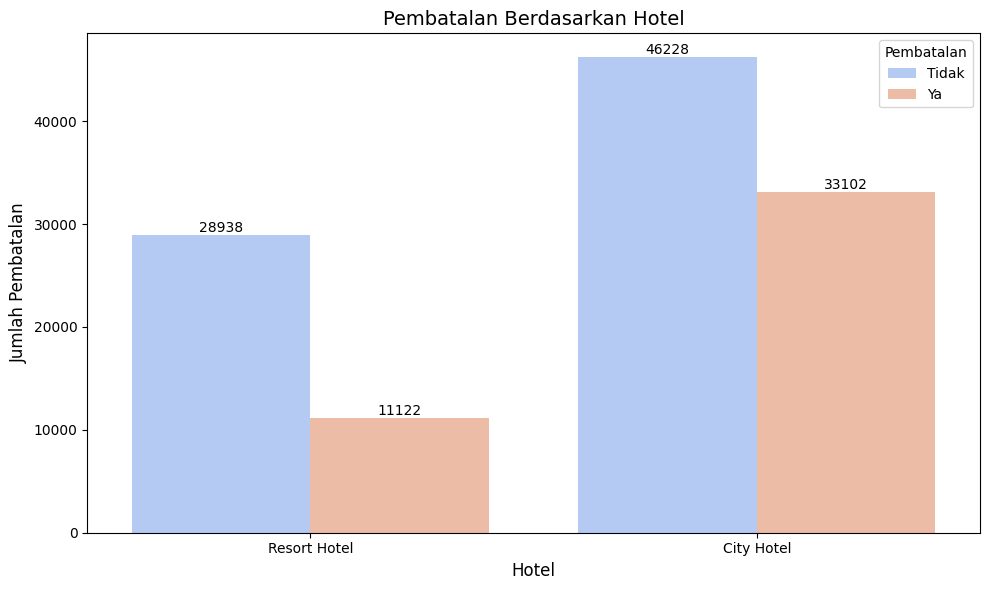

In [ ]:
# Plot pembatalan berdasarkan jumlah malam di akhir pekan
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='hotel', hue='is_canceled', palette='coolwarm')

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',  # Menampilkan nilai
                    (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                    ha='center', va='bottom', fontsize=10)

# Menambahkan judul, label, dan legenda
plt.title('Pembatalan Berdasarkan Hotel', fontsize=14)
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Jumlah Pembatalan', fontsize=12)
plt.legend(title='Pembatalan', loc='upper right', labels=['Tidak', 'Ya'])

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi **pembatalan pemesanan berdasarkan jenis hotel**, dapat disimpulkan bahwa Hotel kota (City Hotel) memiliki jumlah pembatalan yang lebih tinggi dibandingkan dengan Hotel Resort (Resort Hotel). Pada Hotel Kota, jumlah pembatalan mencapai lebih dari 30.000, sementara Hotel Resort mencatatkan sekitar 20.000 pembatalan. Meskipun kedua jenis hotel memiliki pembatalan, proporsi pembatalan di Hotel Kota yang lebih tinggi menunjukkan bahwa faktor lokasi mungkin berpengaruh terhadap keputusan pelanggan untuk membatalkan pemesanan. Secara keseluruhan, visualisasi ini mengindikasikan bahwa Hotel Resort lebih berhasil dalam mempertahankan pemesanan, sementara Hotel Kota menghadapi tantangan lebih besar terkait pembatalan.

#### 5.Ditribusi Pemesanan Makanan

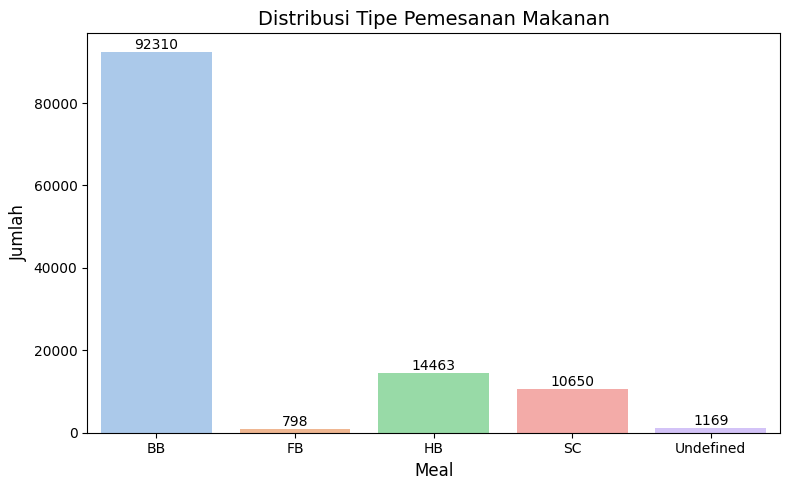

In [ ]:
# Plot distribusi tipe pemesanan makanan
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='meal', data=df, palette='pastel')

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Tipe Pemesanan Makanan', fontsize=14)
plt.xlabel('Meal', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi **distribusi tipe pemesanan makanan**, terlihat bahwa tipe pemesanan "BB" (Bed and Breakfast) mendominasi jumlah pesanan dengan lebih dari 80.000 transaksi. Sementara itu, tipe pemesanan lainnya, seperti "FB" (Full Board), "HB" (Half Board), dan "SC" (Self Catering), memiliki jumlah yang jauh lebih rendah, masing-masing di bawah 30.000. Tipe pemesanan yang belum terdefinisi ("Undefined") juga mencatatkan angka yang rendah. Hal ini menunjukkan bahwa opsi Bed and Breakfast sangat populer di kalangan pelanggan, sedangkan tipe pemesanan lainnya kurang diminati, mengindikasikan preferensi yang jelas untuk layanan yang lebih sederhana dan praktis.

#### 6.10 Negara Pengunjung Terbanyak

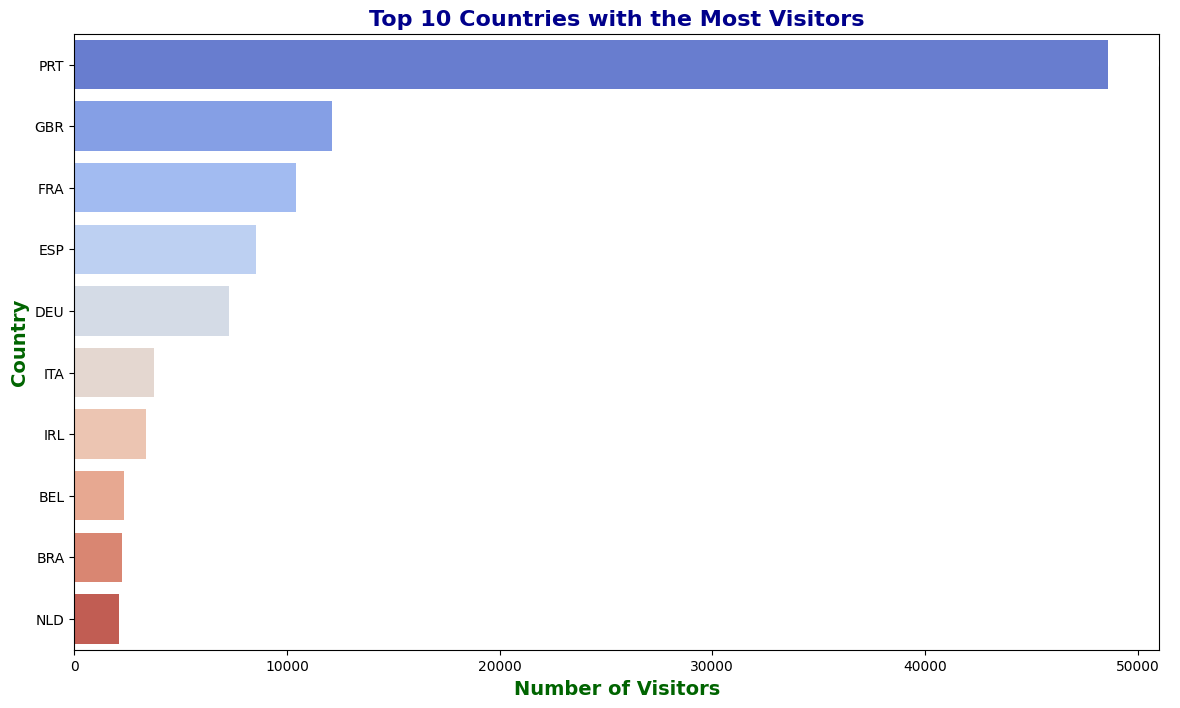

In [ ]:
# Calculate the visitor count for each country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'counts']

# Select the top 10 countries
top_10_countries = country_counts.head(10)

#  Now you can create your barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='counts', y='country', data=top_10_countries, palette='coolwarm')

# Menambahkan angka pada setiap batang untuk menunjukkan jumlah pengunjung
for index, value in enumerate(top_10_countries['counts']):
    plt.text(value + 500, index, f'{value}', ha='left', va='center', fontsize=12, color='white')

# Menambahkan judul dan label sumbu
plt.title('Top 10 Countries with the Most Visitors', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Number of Visitors', fontsize=14, weight='bold', color='darkgreen')
plt.ylabel('Country', fontsize=14, weight='bold', color='darkgreen')

# Menampilkan grafik
plt.show()

Berdasarkan visualisasi yang menunjukkan **10 negara dengan jumlah pengunjung terbanyak**, Portugal (PRT), termasuk pengunjung domestik, menonjol sebagai negara dengan jumlah pengunjung tertinggi, mencapai hampir 50.000. Diikuti oleh Inggris (GBR), Prancis (FRA), dan Spanyol (ESP), yang masing-masing memiliki jumlah pengunjung yang signifikan, meskipun jauh di bawah Portugal. Jerman (DEU), Italia (ITA), Belgia (BEL), Brasil (BRA), dan Belanda (NLD) juga tercatat sebagai negara dengan jumlah pengunjung yang lebih rendah, namun tetap menunjukkan minat kedatangan yang kuat terhadap Negara Portugal.

#### 7.Informasi Saluran Ditribusi Pemesanan

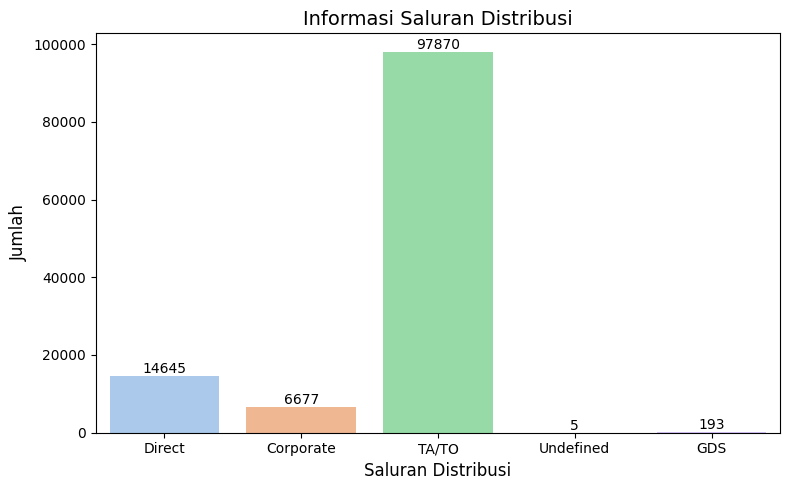

In [ ]:
# Plot distribusi saluran distribusi
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='distribution_channel', data=df, palette='pastel')

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Informasi Saluran Distribusi', fontsize=14)
plt.xlabel('Saluran Distribusi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi **informasi saluran distribusi**, tampak bahwa saluran "TA/TO" (Travel Agent/Tour Operator) merupakan yang paling dominan, dengan jumlah hampir mencapai 100.000. Diikuti oleh saluran "Direct" yang memiliki jumlah yang cukup, tetapi jauh lebih rendah. Saluran "Corporate" dan "GDS" (Global Distribution System) menunjukkan angka yang lebih kecil, sementara saluran "Undefined" hampir tidak terlihat. Kesimpulannya, saluran distribusi utama adalah melalui agen perjalanan dan operator tur dalam menarik pengunjung.

#### 8.Distribusi Jenis Pemesanan terhadap Ketertarikan Hotel

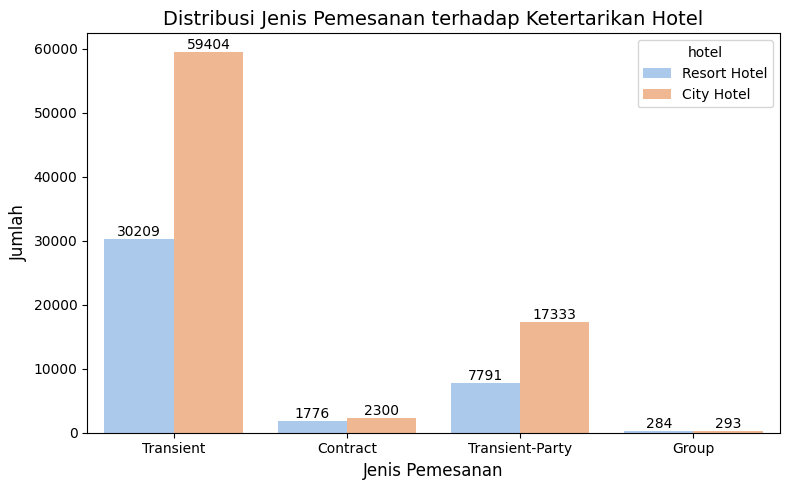

In [ ]:
# Plot distribusi jenis pemesanan terhadap ketertarikan hotel
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='customer_type', hue='hotel', palette='pastel')

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',  # Menampilkan nilai
                    (p.get_x() + p.get_width() / 2., height),  # Posisi teks
                    ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Jenis Pemesanan terhadap Ketertarikan Hotel', fontsize=14)
plt.xlabel('Jenis Pemesanan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi **distribusi jenis pemesanan terhadap ketertarikan hotel**, terlihat bahwa jenis pemesanan "Transient" mendominasi dengan jumlah yang paling tinggi, sekitar 60.000. Sementara itu, "Contract" dan "Transient-Party" memiliki jumlah yang lebih rendah, tetapi pemesan jenis "Transient-Party" menunjukkan ketertarikan yang cukup baik pada hotel. Jenis pemesanan "Group" menunjukkan angka yang paling kecil. Kesimpulannya, pemesanan individual (Transient) merupakan yang paling menarik bagi hotel, sedangkan pemesanan grup dan jenis lainnya lebih terbatas.

#### 9.Informasi Status Reservasi

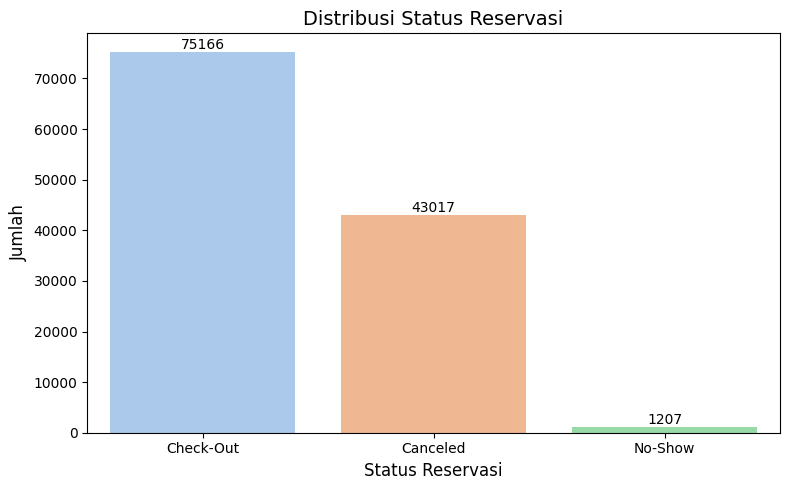

In [ ]:
# Plot distribusi status reservasi
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='reservation_status', palette='pastel')

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Distribusi Status Reservasi', fontsize=14)
plt.xlabel('Status Reservasi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi **distribusi status reservasi**, terlihat bahwa jumlah reservasi yang "Check-Out" sangat tinggi, mencapai lebih dari 70.000. Di sisi lain, status "Canceled" menunjukkan angka yang banyak, tetapi jauh lebih rendah, sekitar 40.000. Sementara itu, status "No-Show" hampir tidak terlihat dengan jumlah yang sangat kecil. Kesimpulannya, mayoritas reservasi berakhir dengan keberangkatan (Check-Out), sementara tingkat pembatalan cukup tinggi, sedangkan kasus tidak hadir (No-Show) sangat minimal.

#### 10.Informasi Jangka Waktu Menginap

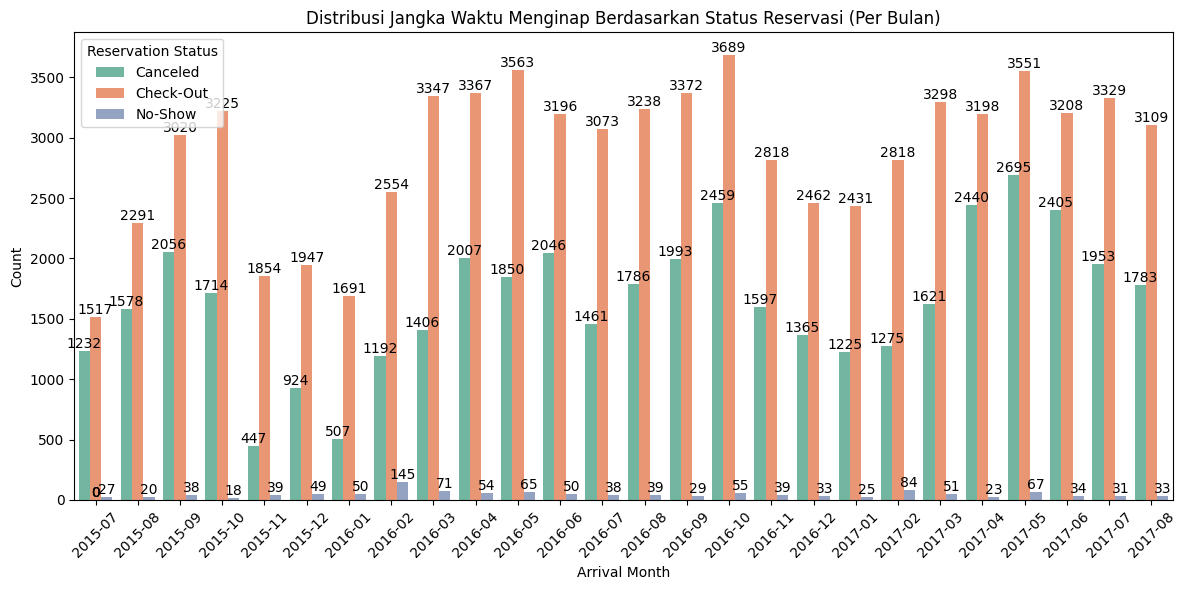

In [ ]:
# Mengonversi kolom tanggal
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)

# Menambahkan kolom bulan sebagai pengelompokan
df['arrival_month'] = df['arrival_date'].dt.to_period('M')  # Mengelompokkan per bulan
status_count = df.groupby(['arrival_month', 'reservation_status']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=status_count, x='arrival_month', y='count', hue='reservation_status', palette='Set2')

# Menambahkan total nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menampilkan nilai
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Jangka Waktu Menginap Berdasarkan Status Reservasi (Per Bulan)')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Reservation Status')
plt.tight_layout()
plt.show()

Visualisasi tersebut menunjukkan distribusi **status reservasi berdasarkan jangka waktu menginap** per bulan dari Juli 2015 hingga Agustus 2017. Dalam visualisasi mayoritas reservasi berakhir dengan status "Check-Out," yang terlihat mendominasi setiap bulan. Pola musiman juga tampak jelas, dengan lonjakan jumlah "Check-Out" pada bulan-bulan tertentu. Reservasi dengan status "Canceled" berada di posisi kedua terbanyak setelah "Check-Out." Meskipun fluktuasi jumlah pembatalan terjadi dari bulan ke bulan, tren umumnya stabil. Di sisi lain, status "No-Show" memiliki jumlah yang sangat kecil dibandingkan dengan dua status lainnya. Jumlah "No-Show" relatif konsisten tanpa fluktuasi besar, yang mengindikasikan bahwa ketidakhadiran tamu pada reservasi jarang terjadi dan tidak memberikan dampak signifikan terhadap pola keseluruhan.

Secara keseluruhan, visualisasi ini menggambarkan bahwa sebagian besar reservasi berhasil dilakukan hingga tahap "Check-Out," diikuti oleh jumlah pembatalan yang cukup signifikan, sementara "No-Show" hanya terjadi dalam jumlah yang sangat kecil. Pola musiman pada status reservasi tertentu memberikan wawasan tambahan yang relevan untuk menganalisis tren perjalanan.

## Ringkasan Eksplorasi Data

Eksplorasi data yang telah dilakukan memberikan banyak informasi dan wawasan untuk memahami dataset **Hotel Bookings Data**. Setiap visualisasi grafik menunjukkan pola yang beragam dan fluktuatif terkait kedatangan, pembatalan dan ketertarikan pengunjung terhadap jenis hotel yang ada (Hotel Kota dan Hotel Resort).

Salah satu analisis visual yang dilakukan adalah untuk menggambarkan distribusi status reservasi berdasarkan waktu kedatangan per bulan. Dalam visualisasi ini menghitung jumlah reservasi berdasarkan kombinasi bulan kedatangan (`arrival_month`) dan status reservasi (`reservation_status`). Dengan menggabungkan kolom `arrival_date_year`, `arrival_date_month`, dan `arrival_date_day_of_month` menjadi kolom baru bernama `arrival_date` yang kemudian dikelompokkan berdasarkan periode bulan menjadi kolom `arrival_month`. Melalui kolom ini, dapat diambil informasi yang lebih jelas dan mudah terkait banyaknya pengunjung yang datang.

Sehingga dari keseluruhan eksplorasi data ini, dapat disimpulkan bahwa adanya pola atau variasi teratur dalam pemesanan dan pembatalan yang terjadi pada waktu-waktu tertentu dalam setahun, serta preferensi yang kuat terhadap saluran distribusi tertentu, tipe pemesanana makanan, dan pengunjung yang datang dari berbagai negara.

# Data Preparation

Data preparation adalah proses yang digunakan untuk membersihkan, mengatur, dan mempersiapkan data sebelum digunakan dalam analisis atau model.

## Pra-pemrosesan Data

 1. **Mengatasi Nilai Hilang:**
   - `children`: Mengisi nilai yang hilang dengan 0.
   - `country`: Mengisi nilai yang hilang dengan nilai mode (negara yang paling sering muncul).
   - `agent`:  Mengisi nilai yang hilang dengan 0.
   
2. **Menghilangkan Kolom:**
  - `company`

3. **Konversi Data:**
   
   Proses konversi dilakukan untuk mengubah kolom-kolom kategorikal seperti `hotel`, `meal`, `country`, dan kolom lainnya ke dalam format numerik sehingga dapat digunakan oleh algoritma machine learning.

3. **Normalisasi Data:**
   
   Pada tahap normalisasi menggunakan StandardScaler untuk menstandarkan kolom-kolom numerik dalam dataset. Proses ini mengubah data sehingga setiap fitur memiliki rata-rata nol dan deviasi standar satu.


In [ ]:
# Mengisi nilai yang hilang
country_mode = df['country'].mode()[0]
df['country'].fillna(country_mode, inplace=True)
df['children'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df.drop(columns=['company'], inplace=True)

In [ ]:
# List kolom numerik untuk LabelEncoder
categorical_columns = ['hotel', 'meal', 'country', 'arrival_date_month', 'market_segment',
                       'distribution_channel', 'reserved_room_type',
                       'assigned_room_type', 'deposit_type',
                       'customer_type', 'reservation_status', 'reservation_status_date', 'arrival_date',	'arrival_month']

label_encoders = {}

for column in categorical_columns:
    if column in df.columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month
0,1,0,2.227051,-1.634768,5,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,0,135,3,1,-0.18156,-0.10318,-0.091555,2,2,4.260101,0,-0.698406,-0.131924,2,-2.015038,-0.254873,-0.720694,1,121,0,0
1,1,0,5.923385,-1.634768,5,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,0,135,3,1,-0.18156,-0.10318,-0.091555,2,2,5.793131,0,-0.698406,-0.131924,2,-2.015038,-0.254873,-0.720694,1,121,0,0
2,1,0,-0.907814,-1.634768,5,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,0,59,3,1,-0.18156,-0.10318,-0.091555,0,2,-0.338990,0,-0.698406,-0.131924,2,-0.530935,-0.254873,-0.720694,1,122,0,0
3,1,0,-0.851667,-1.634768,5,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,0,59,2,0,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,2.138963,-0.131924,2,-0.530935,-0.254873,-0.720694,1,122,0,0
4,1,0,-0.842309,-1.634768,5,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,-0.260659,-0.081579,0,59,6,3,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,1.541622,-0.131924,2,-0.075810,-0.254873,0.540666,1,123,0,0


In [ ]:
# List kolom numerik untuk StandardScaler
numerical_columns = ['lead_time', 'arrival_date_year', 'arrival_date_month',
                     'arrival_date_week_number', 'arrival_date_day_of_month',
                     'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
                     'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
                     'previous_bookings_not_canceled', 'booking_changes', 'agent',
                     'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                     'total_of_special_requests', 'reservation_status_date', 'arrival_month', 'arrival_date']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan standardisasi hanya pada kolom numerik
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Menampilkan hasil Standardisasi
df[numerical_columns].head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_month,arrival_date
0,2.227051,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,4.260101,-0.698406,-0.131924,-2.015038,-0.254873,-0.720694,-1.739749,-1.828888,-1.898893
1,5.923385,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,5.793131,-0.698406,-0.131924,-2.015038,-0.254873,-0.720694,-1.739749,-1.828888,-1.898893
2,-0.907814,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-0.698406,-0.131924,-0.530935,-0.254873,-0.720694,-1.735353,-1.828888,-1.898893
3,-0.851667,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,2.138963,-0.131924,-0.530935,-0.254873,-0.720694,-1.735353,-1.828888,-1.898893
4,-0.842309,-1.634768,-0.138765,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,1.541622,-0.131924,-0.075810,-0.254873,0.540666,-1.730957,-1.828888,-1.898893


## Hasil Pra-pemrosesan Data

In [ ]:
df # Menampilkan hasil keseluruhan data setelah pra-pemrosesan

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month
0,1,0,2.227051,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,-0.081579,0,135,3,1,-0.18156,-0.10318,-0.091555,2,2,4.260101,0,-0.698406,-0.131924,2,-2.015038,-0.254873,-0.720694,1,-1.739749,-1.898893,-1.828888
1,1,0,5.923385,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,-0.081579,0,135,3,1,-0.18156,-0.10318,-0.091555,2,2,5.793131,0,-0.698406,-0.131924,2,-2.015038,-0.254873,-0.720694,1,-1.739749,-1.898893,-1.828888
2,1,0,-0.907814,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,-0.081579,0,59,3,1,-0.18156,-0.10318,-0.091555,0,2,-0.338990,0,-0.698406,-0.131924,2,-0.530935,-0.254873,-0.720694,1,-1.735353,-1.898893,-1.828888
3,1,0,-0.851667,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,-0.081579,0,59,2,0,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,2.138963,-0.131924,2,-0.530935,-0.254873,-0.720694,1,-1.735353,-1.898893,-1.828888
4,1,0,-0.842309,-1.634768,-0.138765,-0.012141,-1.685297,-0.928890,-0.262174,0.247897,-0.260659,-0.081579,0,59,6,3,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,1.541622,-0.131924,2,-0.075810,-0.254873,0.540666,1,-1.730957,-1.898893,-1.828888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,-0.758089,1.192195,-1.270288,0.575875,1.617366,1.073895,1.309924,0.247897,-0.260659,-0.081579,0,15,5,3,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,2.978973,-0.131924,2,-0.112616,-0.254873,-0.720694,1,1.768322,1.637826,1.575307
119386,0,0,-0.018822,1.192195,-1.270288,0.575875,1.731251,1.073895,1.309924,1.974242,-0.260659,-0.081579,0,56,6,3,-0.18156,-0.10318,-0.091555,4,4,-0.338990,0,-0.614405,-0.131924,2,2.445779,-0.254873,1.802026,1,1.772718,1.642297,1.575307
119387,0,0,-0.655153,1.192195,-1.270288,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,-0.081579,0,43,6,3,-0.18156,-0.10318,-0.091555,3,3,-0.338990,0,-0.614405,-0.131924,2,1.105733,-0.254873,4.324746,1,1.772718,1.642297,1.575307
119388,0,0,0.046682,1.192195,-1.270288,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,-0.081579,0,59,6,3,-0.18156,-0.10318,-0.091555,0,0,-0.338990,0,0.132271,-0.131924,2,0.050833,-0.254873,-0.720694,1,1.772718,1.642297,1.575307


In [ ]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# Menampilkan jumlah baris dan kolom dalam dataset
df.shape

(119390, 33)

**Setelah pembersihan**, dataset mencakup:
- **Periode Pengumpulan**: 1 Juli 2015 - 31 Agustus 2017
- **Jumlah Observasi:** 119.390
- **Jumlah Variabel:** 33

Dengan ini terjadi penambahan jumlah variabel, dari 32 menjadi 33. Penambahan ada pada variabel bernama `arrival_date`. Dimana variabel ini, menggabungkan isi dari 3 variabel (`arrival_date_year`, `arrival_date_month`, dan `arrival_date_day_of_month`) dalam format Year-Month-Date (Y-M-d). Kemudian, dengan tujuan mendapatkan informasi baru dilakukan pengelompokkan, menjadi variabel baru bernama `arrival_month`.        

Disamping penambahan, juga dilakukan penghapusan variabel selama proses pemrosesan data. Pada variabel dengan nama `company`.

### Informasi Variabel dalam Dataset

Dalam dataset hotel.csv terdapat beberapa kolom yang menjadi acuan penting untuk pengolahan eksplorasi data. Kolom ini dipilih berdasarkan informasi isi kolom yang terkait dengan topik pembatalan pemesanan hotel. Untuk itu, deskripsi penjelasan diberikan untuk memberikan informasi yang lengkap.  

In [ ]:
data = {
    'Kolom': ['Hotel', 'Is Canceled', 'Lead Time', 'Meal', 'Country', 'Market Segment',
                 'Distribution Channel', 'Days in Waiting List', 'Customer Type', 'Reservation Status'],
    'Deskripsi Singkat': ['Jenis hotel yang dipesan (resort atau city)',
                          'Status pemesanan: dibatalkan atau tidak',
                          'Waktu antara pemesanan dan kedatangan (dalam hari)',
                          'Pilihan makanan yang dipesan (misalnya, sarapan, makan siang, makan malam)',
                          'Negara asal pemesan (berdasarkan kode negara)',
                          'Segmen pasar tempat pemesan melakukan pemesanan',
                          'Saluran distribusi yang digunakan untuk pemesanan',
                          'Jumlah hari yang dihabiskan pemesan dalam waiting list sebelum pemesanan dikonfirmasi',
                          'Jenis pelanggan (baru atau kembali)',
                          'Status pemesanan terakhir'],
    'Isi Kolom': ['Resort, City Hotel', '0, 1', '0 - 400', 'SC, BB, HB, FB',
                      'PRT, DEU, GBR, FRA', 'Corporate, Online TA, Offline TA, Group',
                      'Corporate, Online TA, Offline TA, Group', '0 - 1000',
                      'Contract, Transient, Transient-Party', 'Canceled, Check-Out, No Show']
}

# Membuat DataFrame dari dictionary
df_summary = pd.DataFrame(data)

# Menampilkan tabel
df_summary

,Kolom,Deskripsi Singkat,Isi Kolom
0,Hotel,Jenis hotel yang dipesan (resort atau city),"Resort, City Hotel"
1,Is Canceled,Status pemesanan: dibatalkan atau tidak,"0, 1"
2,Lead Time,Waktu antara pemesanan dan kedatangan (dalam h...,0 - 400
3,Meal,"Pilihan makanan yang dipesan (misalnya, sarapa...","SC, BB, HB, FB"
4,Country,Negara asal pemesan (berdasarkan kode negara),"PRT, DEU, GBR, FRA"
5,Market Segment,Segmen pasar tempat pemesan melakukan pemesanan,"Corporate, Online TA, Offline TA, Group"
6,Distribution Channel,Saluran distribusi yang digunakan untuk pemesanan,"Corporate, Online TA, Offline TA, Group"
7,Days in Waiting List,Jumlah hari yang dihabiskan pemesan dalam wait...,0 - 1000
8,Customer Type,Jenis pelanggan (baru atau kembali),"Contract, Transient, Transient-Party"
9,Reservation Status,Status pemesanan terakhir,"Canceled, Check-Out, No Show"


# Pemodelan

Sebelum dilakukan pelatihan model, langkah pertama adalah memisahkan fitur dan target dalam dataset. Di bawah ini, pemisahan dilakukan pada kolom is_canceled sebagai target (y) dan sisanya sebagai fitur (X). Setelah itu, data akan dibagi menjadi set pelatihan dan pengujian untuk keperluan evaluasi model.

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Setelah membagi data menjadi pelatihan dan pengujian, langkah selanjutnya adalah menginisialisasi model klasifikasi. Di bawah ini, menggunakan model RandomForestClassifier dan kemudian melatih model tersebut menggunakan data pelatihan yang telah disiapkan.

In [ ]:
# Inisialisasi model RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
history = rf_classifier.fit(X_train, y_train)

# Evaluasi

Langkah berikutnya adalah evaluasi untuk prediksi pada data uji. Menggunakan model yang telah dilatih untuk memprediksi nilai target pada set pengujian. Untuk mengetahui kinerja model dengan menghitung akurasinya.

In [ ]:
# Lakukan prediksi pada data uji
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Random Forest: {accuracy}")

Akurasi Model Random Forest: 0.9999581204455985


Setelah melakukan prediksi pada data uji, dilakukan analisa lebih lanjut dengan menghitung probabilitas dari kelas positif. Dalam langkah ini, menghitung Mean Squared Error (MSE) dan Root Mean Squared Error (RMSE) menggunakan probabilitas yang diprediksi, untuk mendapatkan gambaran yang lebih jelas tentang kinerja model.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prediksi probabilitas
y_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif (1)

# Hitung MSE (dengan probabilitas sebagai nilai kontinu)
mse = mean_squared_error(y_test, y_proba)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE) dengan probabilitas: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE) dengan probabilitas: 0.0005752826869922104
Root Mean Squared Error (RMSE): 0.02398505132352671


Setelah mengevaluasi model menggunakan metrik akurasi dan kesalahan, langkah selanjutnya adalah mencetak laporan klasifikasi. Laporan ini akan memberikan informasi yang lebih mendetail mengenai kinerja model, termasuk precision, recall, dan F1-score untuk masing-masing kelas.

In [ ]:
# Cetak laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



Setelah mencetak laporan klasifikasi, langkah terakhir adalah membuat dan memvisualisasikan prediksi dalam Confusion Matrix. Confusion Matrix akan memberikan gambaran yang jelas tentang jumlah prediksi yang benar dan salah untuk masing-masing kelas (Not Canceled dan Canceled), sehingga dapat lebih memahami kinerja model secara keseluruhan.

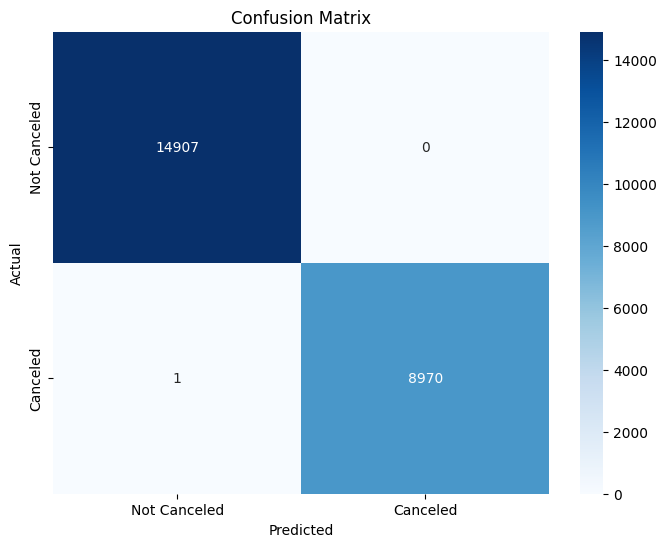

In [ ]:
# Buat Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Rangkuman

Analisis ini bertujuan untuk memahami faktor-faktor yang memengaruhi pembatalan pemesanan serta preferensi pelanggan guna meningkatkan strategi pemasaran dan meminimalisir pembatalan. Data yang digunakan mencakup berbagai informasi, seperti negara asal pengunjung, jenis hotel, saluran distribusi, dan status pemesanan. Dalam proses analisis, metode yang diterapkan meliputi visualisasi data menggunakan histogram, serta pemodelan klasifikasi dengan algoritma Random Forest untuk memprediksi pembatalan pemesanan. Data pra-pemrosesan juga dilakukan, termasuk pengisian nilai yang hilang, penghapusan kolom, konversi data kategorikal menjadi numerik, dan standardisasi data numerik.

Hasil analisis mengungkapkan beberapa wawasan menarik, seperti Portugal yang menjadi negara asal pengunjung terbanyak, transaksi pembatalan pemesanan, serta saluran distribusi utama melalui agen perjalanan. Selain itu, terdapat pola dalam status reservasi. Model Random Forest yang digunakan menunjukkan performa tertentu dalam memprediksi pembatalan, dengan metrik evaluasi seperti MSE, RMSE, precision, recall, dan F1-score memberikan gambaran kinerja model secara keseluruhan.

Implikasi dari analisis ini mencakup pemahaman preferensi pelanggan berdasarkan negara asal dan jenis pemesanan, yang dapat dimanfaatkan hotel untuk menyesuaikan strategi pemasaran dan layanan. Namun, analisis ini memiliki keterbatasan, karena hanya menggunakan data yang tersedia. Penambahan data lain, seperti demografi pelanggan, harga, dan ulasan, berpotensi memberikan wawasan yang lebih mendalam. Dalam model Random Forest juga dapat ditingkatkan melalui penyetelan parameter atau eksplorasi model lain.